# MoneyBall: NBA Player Salaries with Big Data and Machine Learning

Author: Owen Ellick

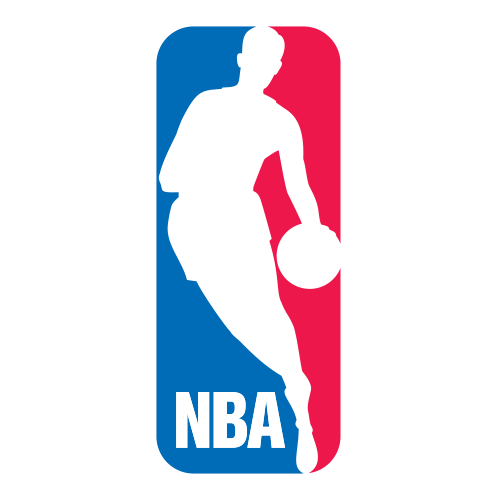

## Introduction:

### Background

The NBA is home to some of the highest-paid athletes in the world, with salaries often reflecting a combination of player skill, team needs, and market dynamics. However, determining what truly drives these salaries remains a complex challenge. By analyzing a dataset of NBA player statistics, we aim to uncover the factors that most strongly influence player salaries.
    
Understanding these factors can provide valuable insights for team management, player evaluation, and even salary negotiations. In an era of data-driven decision-making, leveraging machine learning and statistical analysis can help uncover hidden patterns that would otherwise go unnoticed.

### Statement of the Project Interest

The goal of this project is to analyze NBA player performance metrics to understand their relationship with player salaries. By leveraging statistical analysis and machine learning techniques, we aim to uncover the key drivers of player earnings.

This analysis will provide insights into how various performance metrics—like points scored, assists, rebounds, and efficiency ratings—impact player salaries.

Through this project, we aim to showcase the value of data-driven decision-making in sports management while offering actionable insights into the factors that influence player salary structures in the NBA.

## Data Storytelling:

### Questions and Objectives:

The primary goal of this project is to analyze how various player performance metrics relate to NBA player salaries. By using salary as the outcome variable in regression and machine learning models, we aim to identify the key factors that influence salaries and quantify their impact.

This analysis will focus on:
1. Building and interpreting regression models with salary as the outcome variable to understand its relationship with performance metrics.
2. Applying machine learning models to explore complex relationships and evaluate their performance in explaining salary variance.
3. Using clustering and dimensionality reduction techniques to uncover hidden patterns in player performance and salary data.

By taking a data-driven approach, we aim to provide insights into the factors that drive NBA player salaries and demonstrate the utility of advanced analytics in sports management.

### Data Transformation and Descriptive Statistics:

#### Load Data

In [2]:
import pandas as pd
import numpy as np

url = url = "http://bcdanl.github.io/data/nba_players.csv"
nba_data = pd.read_csv(url)

#### Dataset Summary

In [ ]:
print("Dataset Shape:", nba_data.shape)
print("\nFirst Few Rows of the Dataset:")
display(nba_data.head())

Dataset Shape: (467, 51)

First Few Rows of the Dataset:


,PlayerName,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV_pct,USG_pct,OWS,DWS,WS,WS_per_48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


#### Check for Missing Values

In [ ]:
print("\nMissing Values in Each Column:")
missing_values = nba_data.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values in Each Column:
FG_pct      1
3P_pct     13
2P_pct      4
eFG_pct     1
FT_pct     23
TS_pct      1
3PAr        1
FTr         1
dtype: int64


#### Summary Statistics for Numeric Variables

In [ ]:
print("\nSummary Statistics for Numeric Variables:")
display(nba_data.describe())


Summary Statistics for Numeric Variables:


,Salary,Age,GP,GS,MP,FG,FGA,FG_pct,3P,3PA,...,TOV_pct,USG_pct,OWS,DWS,WS,WS_per_48,OBPM,DBPM,BPM,VORP
count,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,0.996574,2.792719,...,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,0.880468,2.260794,...,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,0.300000,1.000000,...,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,2.400000,...,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,1.500000,4.150000,...,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,...,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


#### Explore Categorical Variables

In [ ]:
print("\nUnique Values in Categorical Columns:")
categorical_columns = ['Position', 'Team']
for col in categorical_columns:
    print(f"{col}: {nba_data[col].nunique()} unique values")
    print(nba_data[col].value_counts())
    print()


Unique Values in Categorical Columns:
Position: 9 unique values
Position
SG       115
C         91
SF        91
PF        86
PG        77
PG-SG      2
SF-SG      2
SG-PG      2
SF-PF      1
Name: count, dtype: int64

Team: 75 unique values
Team
SAC        19
SAS        17
WAS        17
CLE        16
BOS        16
           ..
BOS/TOR     1
BRK/LAC     1
SAS/PHI     1
BRK/MIA     1
MIA/WAS     1
Name: count, Length: 75, dtype: int64



#### Transformation of Salary Variable

In [133]:
nba_data['Salary_Millions'] = nba_data['Salary'] / 1_000_000
filtered_nba_data = nba_data.drop(columns=['Salary'])
# Display the first few rows to confirm the transformation
print("Updated NBA Data with Salary in Millions:")
display(filtered_nba_data.head())

Updated NBA Data with Salary in Millions:


,PlayerName,Position,Age,Team,GP,GS,MP,FG,FGA,FG_pct,...,USG_pct,OWS,DWS,WS,WS_per_48,OBPM,DBPM,BPM,VORP,Salary_Millions
0,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,...,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7,48.070014
1,John Wall,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,...,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1,47.345760
2,Russell Westbrook,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,...,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2,47.080179
3,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,...,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0,44.474988
4,Kevin Durant,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,...,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9,44.119845


### Data Visualization

- Below are two plot visualizatons intented to get you more familiar with the dataframe.

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

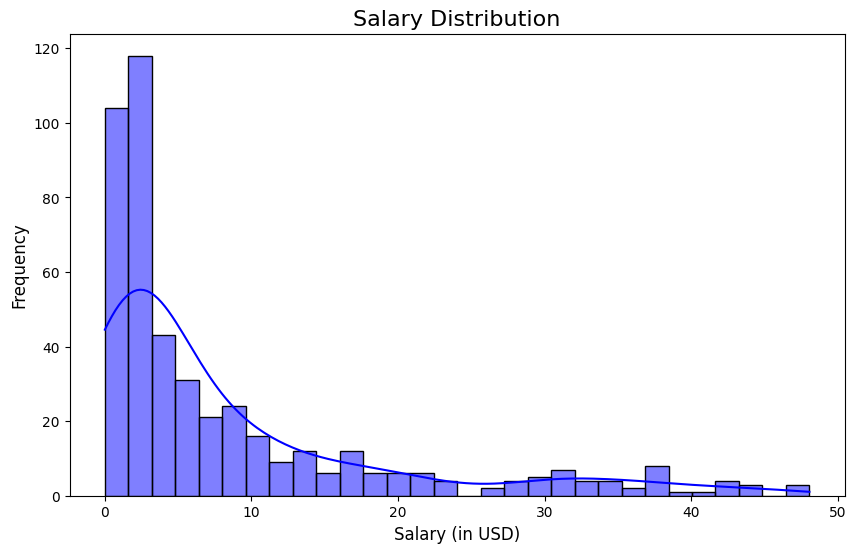

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_nba_data['Salary_Millions'], kde=True, color='blue', bins=30)
plt.title('Salary Distribution', fontsize=16)
plt.xlabel('Salary (in USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


- Here we can see a basic Salary Distribution showing a significant right skew with most observations for salary falling below $10 million USD

<ipython-input-103-6dd3f4b13577>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Salary', data=nba_data, palette='muted')


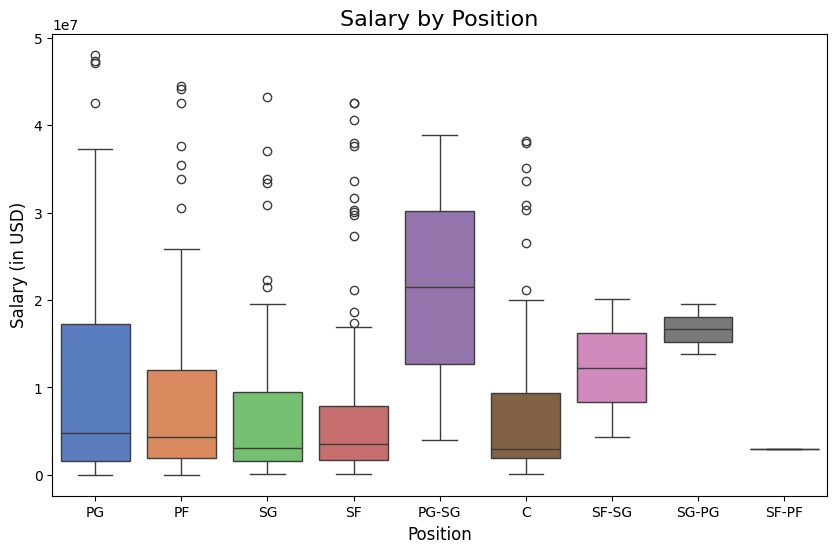

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Salary', data=nba_data, palette='muted')
plt.title('Salary by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)
plt.show()

- The above plot shows a basic boxplot showing the relationship between position and salary.
- The PG-SG position clearly makes more than every other position which makes sense as point guards are ball dominate players and shooting guards are relied on for scoring and perimeter play

### Machine Learning Analysis

#### New Filtered Datafram with only desired variables

In [134]:
predictors = ['PTS', 'AST', 'TRB', 'STL', 'TOV', 'ORB', 'DRB', 'FG', 'FG_pct', 'FT', 'PF', 'BLK']  # Example performance metrics
columns_to_keep = predictors + ['Salary_Millions']
filtered_nba_data = filtered_nba_data[columns_to_keep].dropna()

# Step 4: Display the first few rows of the filtered data
print("Filtered NBA Data:")
display(filtered_nba_data.head())

Filtered NBA Data:


,PTS,AST,TRB,STL,TOV,ORB,DRB,FG,FG_pct,FT,PF,BLK,Salary_Millions
0,29.4,6.3,6.1,0.9,3.2,0.7,5.4,10.0,0.493,4.6,2.1,0.4,48.070014
1,11.4,5.2,2.7,0.8,2.4,0.4,2.3,4.1,0.408,2.3,1.7,0.4,47.345760
2,15.9,7.5,5.8,1.0,3.5,1.2,4.6,5.9,0.436,2.8,2.2,0.5,47.080179
3,28.9,6.8,8.3,0.9,3.2,1.2,7.1,11.1,0.500,4.6,1.6,0.6,44.474988
4,29.1,5.0,6.7,0.7,3.3,0.4,6.3,10.3,0.560,6.5,2.1,1.4,44.119845


#### Lasso Linear Regression

In [135]:
import pandas as pd
import numpy as np
from tabulate import tabulate  # for table summary
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # for lowess smoothing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.inspection import PartialDependenceDisplay

In [136]:
predictors = ['PTS', 'AST', 'TRB', 'STL','TOV', 'ORB', 'DRB', 'FG', 'FG_pct', 'FT', 'PF', 'BLK']  # Example performance metrics
X = filtered_nba_data[predictors]
y = filtered_nba_data['Salary_Millions']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
lasso_model = LassoCV(cv=5, random_state=42).fit(X_train, y_train)


In [139]:
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [141]:
print("Lasso Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Lasso Regression Model Evaluation:
Mean Squared Error (MSE): 55.08
R² Score: 0.59


- MSE: The MSE values indidcate. that the model's predictions. are close but still have significant room for improvement.
- The R Squared value of .59 tells us that approximately 59% of the variance in NBA player salaries is explained by our selected predictors.
  -  This is a strong relationship however, 41% of the variance remains unexplained.

In [142]:
coefficients = pd.DataFrame({
    'Predictor': predictors,
    'Coefficient': lasso_model.coef_
})
print("\nSignificant Predictors (Non-Zero Coefficients):")
display(coefficients[coefficients['Coefficient'] != 0])


Significant Predictors (Non-Zero Coefficients):


,Predictor,Coefficient
0,PTS,0.327571
1,AST,0.786083
5,ORB,-2.318612
6,DRB,1.986067
7,FG,0.757082
9,FT,0.173081
10,PF,-0.922953
11,BLK,2.991871


- Here are few predictors have non-zero coefficients, meaning these are the most important drivers of salary:
  - PTS (PTS Per Game): As expected, scoring points is a major driver of player salaries. Each additional point per game increases salary by approximately $778,512.

  - AST (Assists Per Game): Similarly to Points, Assists are a major driver of player salaries. Each additional assist increases salary approximately $525,896.

  - DRB (Defensive Rebounds Per Game): Defensive rebounds are also significant, with each additional defensive rebound increasing salary by $985,554.
  
  - PF (Personal Fouls Per Game): Personal fouls are detrimental to player and team success so it makes sense that the value is negative meaning it leads to a reduction of the salary variable.

In [143]:
print(f"\nOptimal Alpha (Regularization Strength): {lasso_model.alpha_}")


Optimal Alpha (Regularization Strength): 0.07947842876327585


- Alpha: 0.07947842876327585
  - This value controls the strength of regularization. This alpha like this suggests a lower penalty, which is why not many coefficients were shrunk to zero.

#### Regression Tree and Pruned Regression Tree

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [145]:
predictors = ['PTS', 'AST', 'TRB', 'STL','TOV', 'ORB', 'DRB', 'FG', 'FG_pct', 'FT', 'PF', 'BLK']  # Example performance metrics
X = filtered_nba_data[predictors]
y = filtered_nba_data['Salary_Millions']
np.random.seed(42120532)
train, test = train_test_split(filtered_nba_data, test_size=0.20, random_state=42120532)

Training MSE: 0.186
Test MSE: 111.568


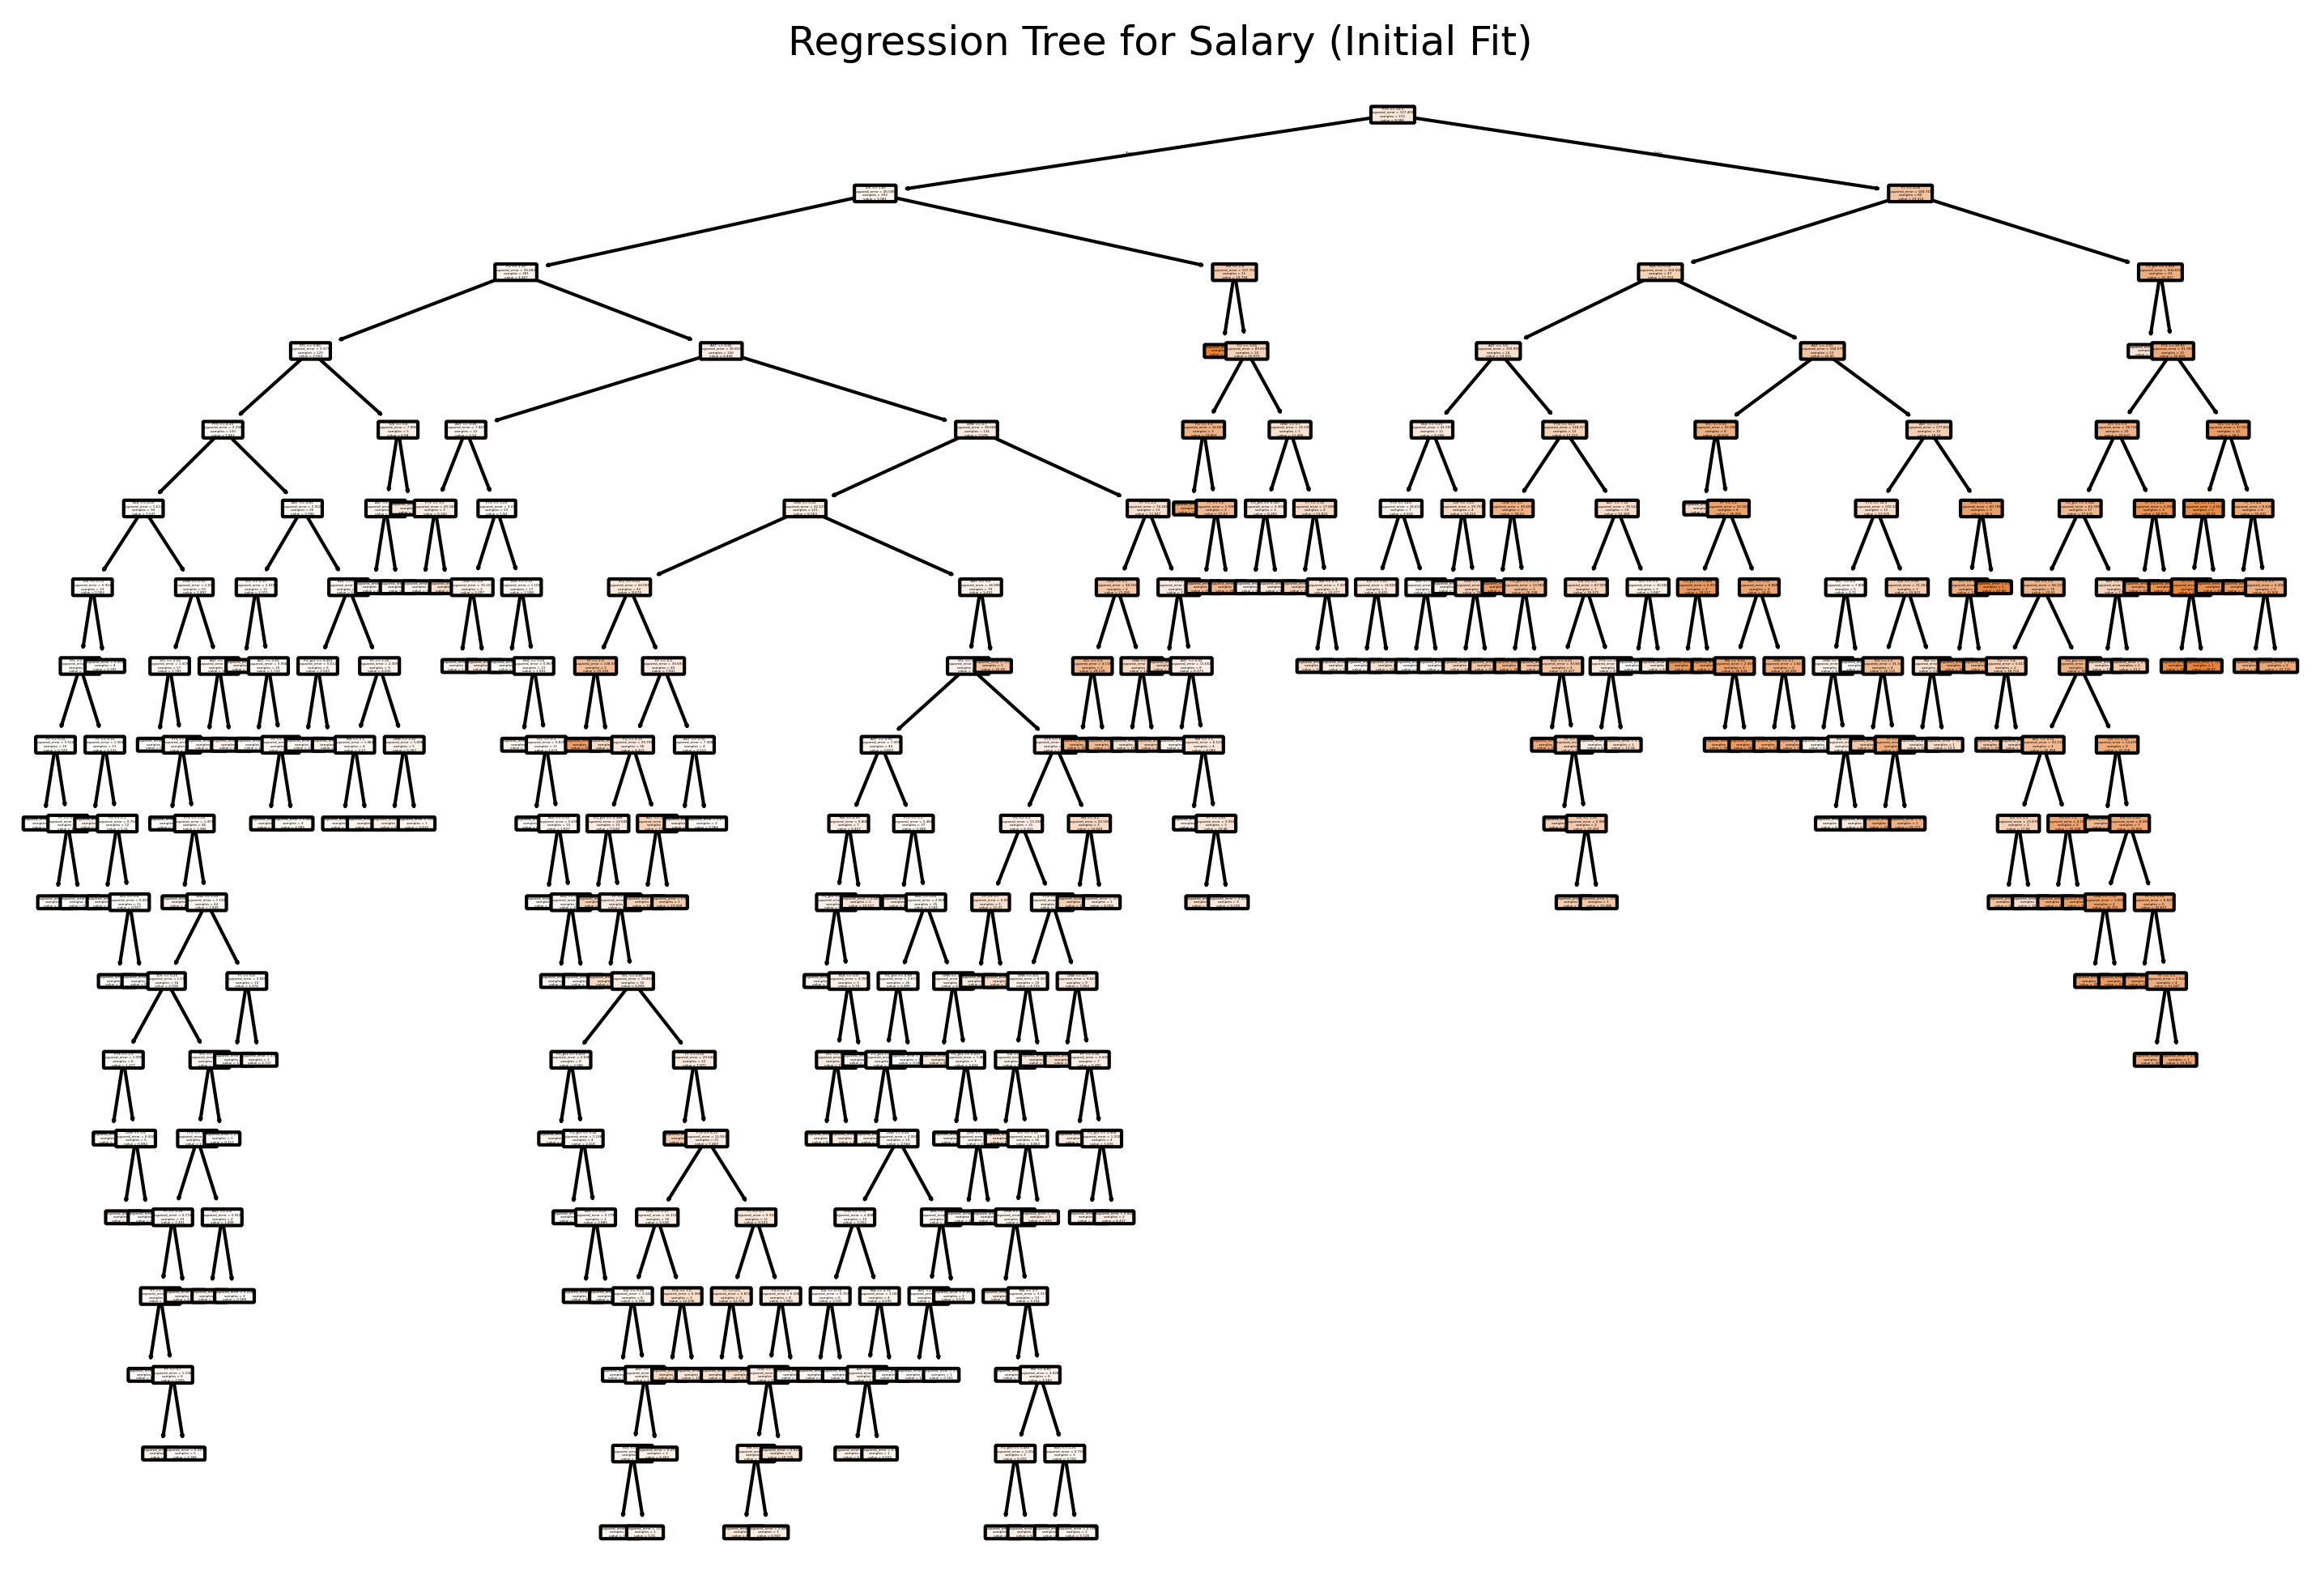

In [146]:
X_train = train.drop(columns=["Salary_Millions"]) # Drop non-numeric columns
y_train = train["Salary_Millions"]

X_test = test.drop(columns=["Salary_Millions"]) # Drop non-numeric columns
y_test = test["Salary_Millions"]

# In scikit-learn, we can use min_impurity_decrease=0.005 for a similar effect.
tree_model = DecisionTreeRegressor(min_impurity_decrease=0.005, random_state=42)
# Fit the model using all predictors (all columns except 'medv')
tree_model.fit(X_train, y_train)


# Predict on training and test sets
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"Training MSE: {mse_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")

# Plot the initial regression tree
plt.figure(figsize=(12, 8), dpi = 300)
plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Regression Tree for Salary (Initial Fit)")
plt.show()

- This shows a regression tree with no max depth constraint.

Training MSE: 43.797
Test MSE: 55.191


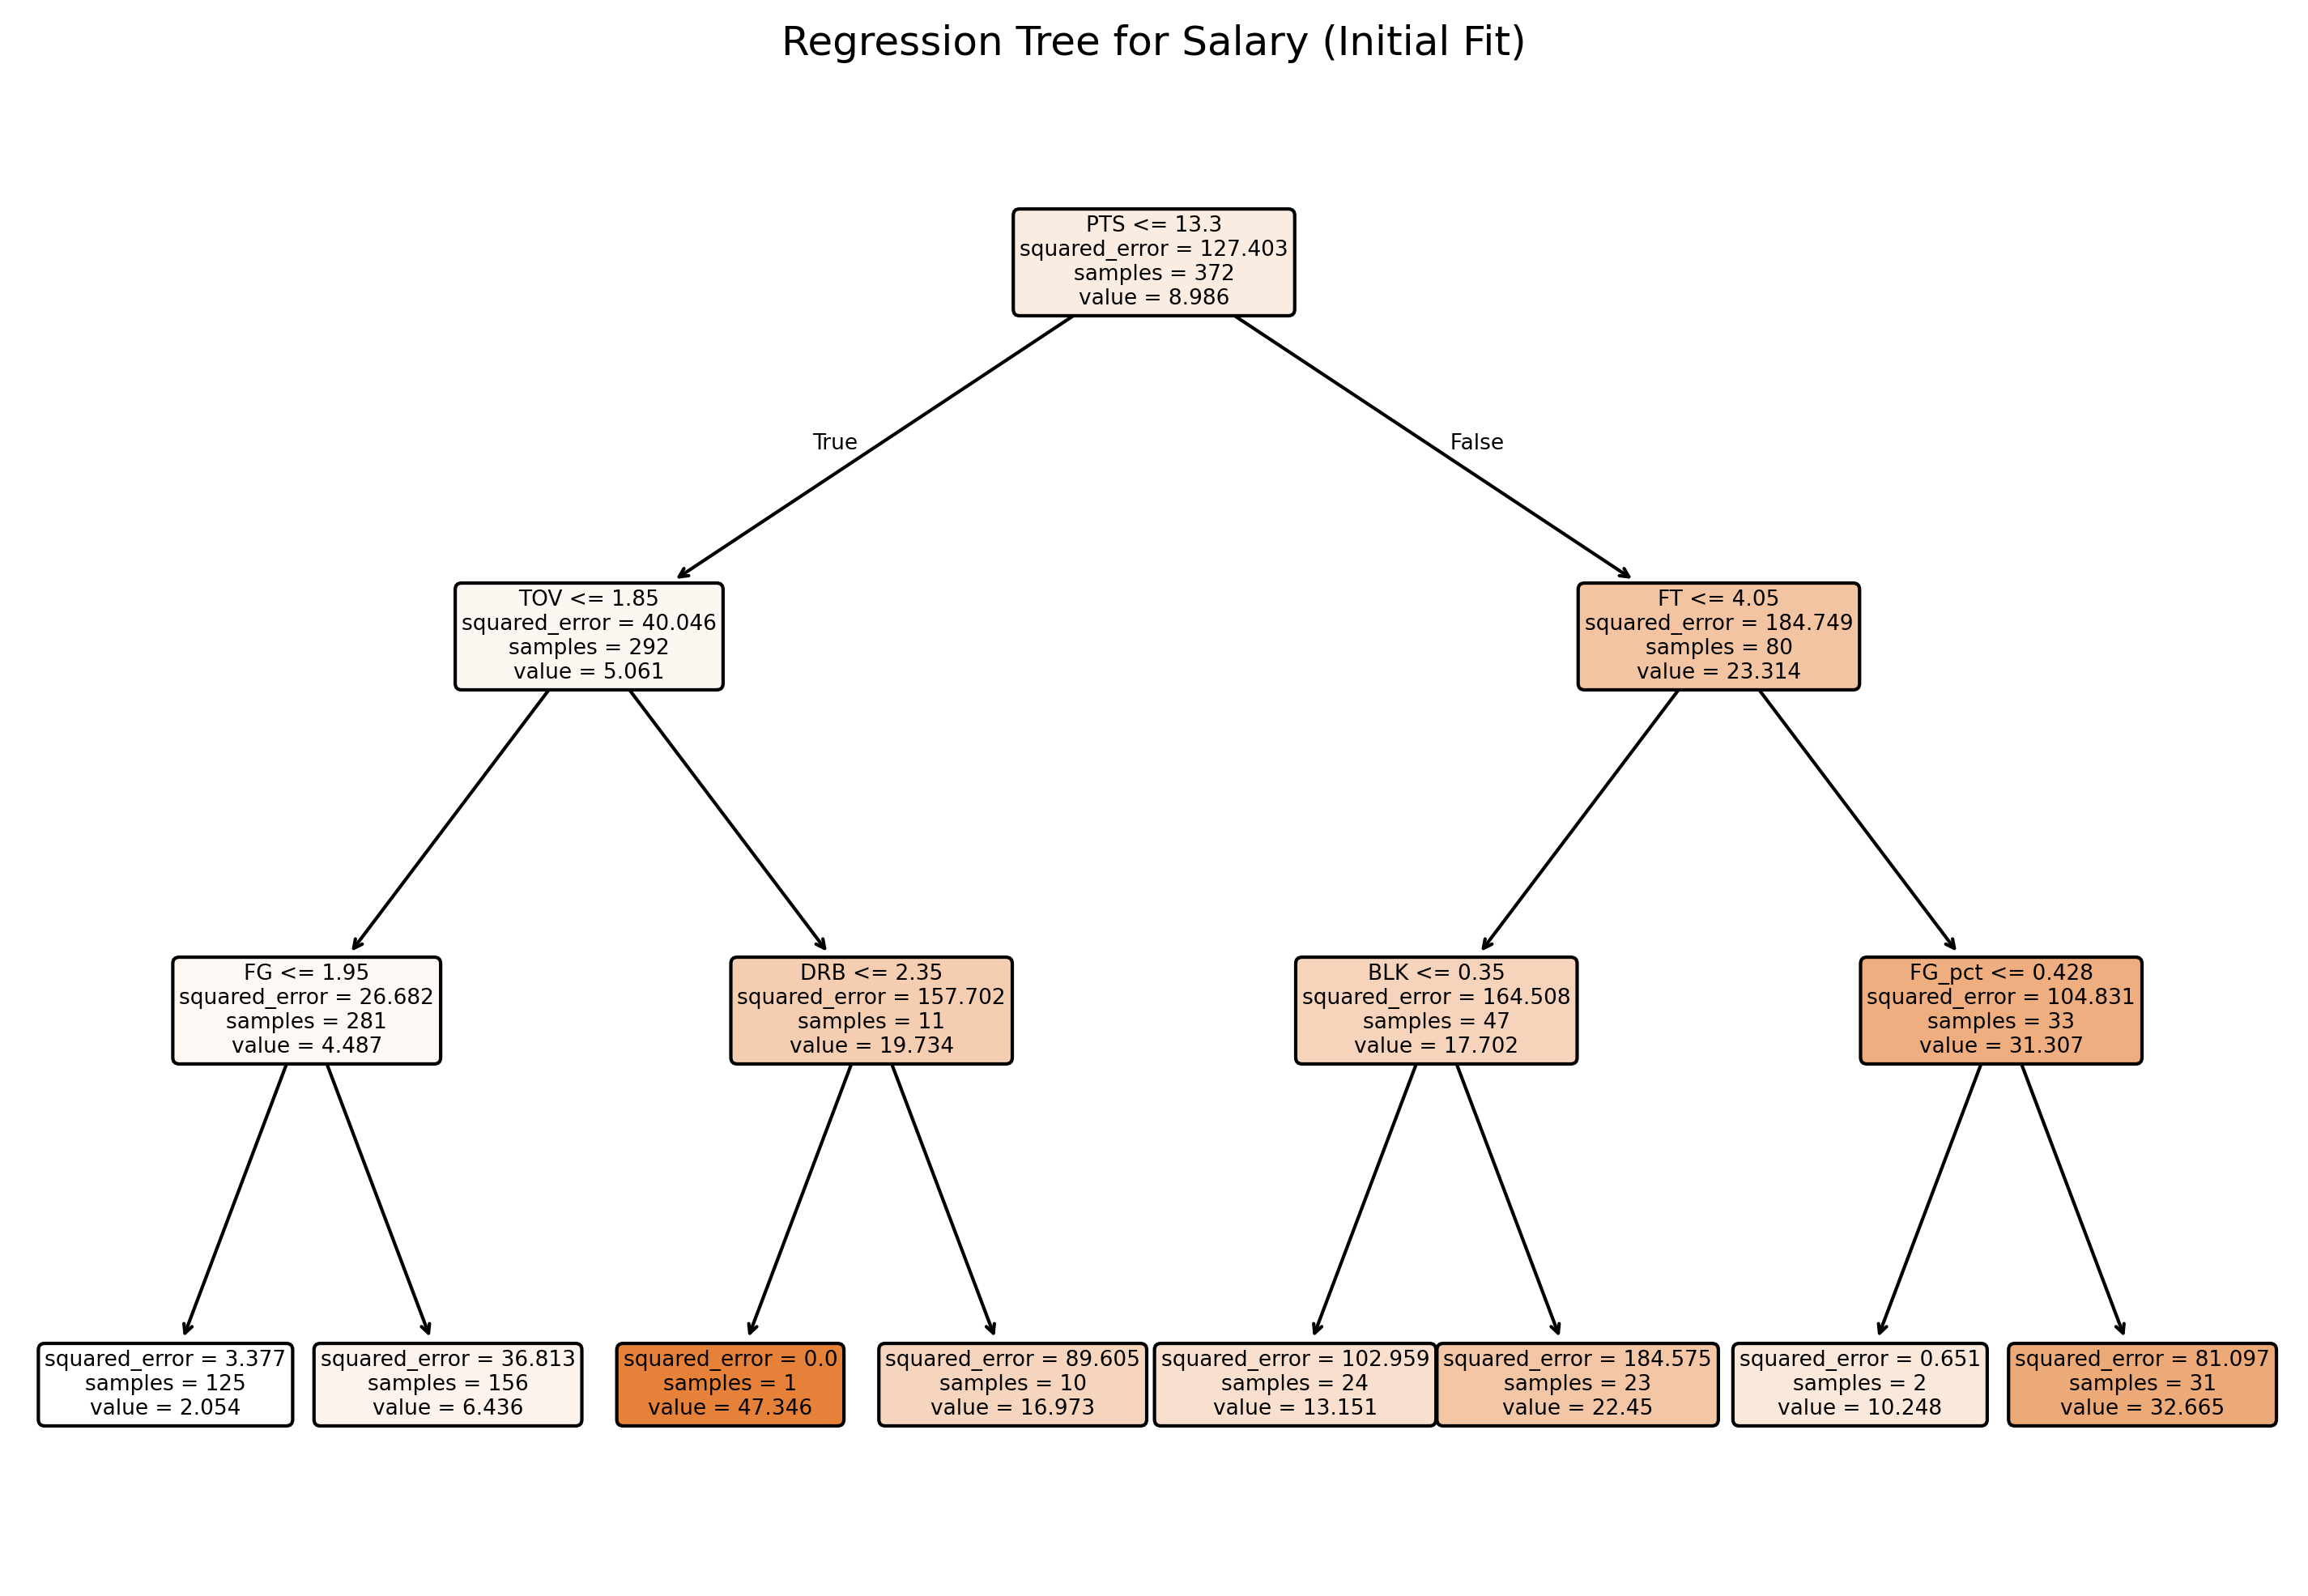

In [147]:
# In scikit-learn, we can use min_impurity_decrease=0.005 for a similar effect.
tree_model = DecisionTreeRegressor(max_depth=3, min_impurity_decrease=0.005, random_state=42)
# Fit the model using all predictors (all columns except 'medv')
tree_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"Training MSE: {mse_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")

# Plot the initial regression tree
plt.figure(figsize=(12, 8), dpi = 300)
plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Regression Tree for Salary (Initial Fit)")
plt.show()

Insights from This Tree
  - We used a max depth constraint for this tree.
1. Key Thresholds:
- The regression tree splits the data based on various predictors.
2. Key Observations:
- The first split is on PTS (Points Scored), which indicates that PTS is the single most important variable for predicting salary in this model. This makes sense as scoring is often a key determinant of player value.
- Additional splits occur on variables like TOV (Turnovers), TRB (Total Rebounds), DRB (Defensive Rebounds), and FG (Field Goals), showing that both offensive and defensive metrics influence salary predictions.

#### Pruned Tree

Best alpha: 2.730214543037146
Train MSE: 43.00074544806712
Test MSE: 67.23647271871953


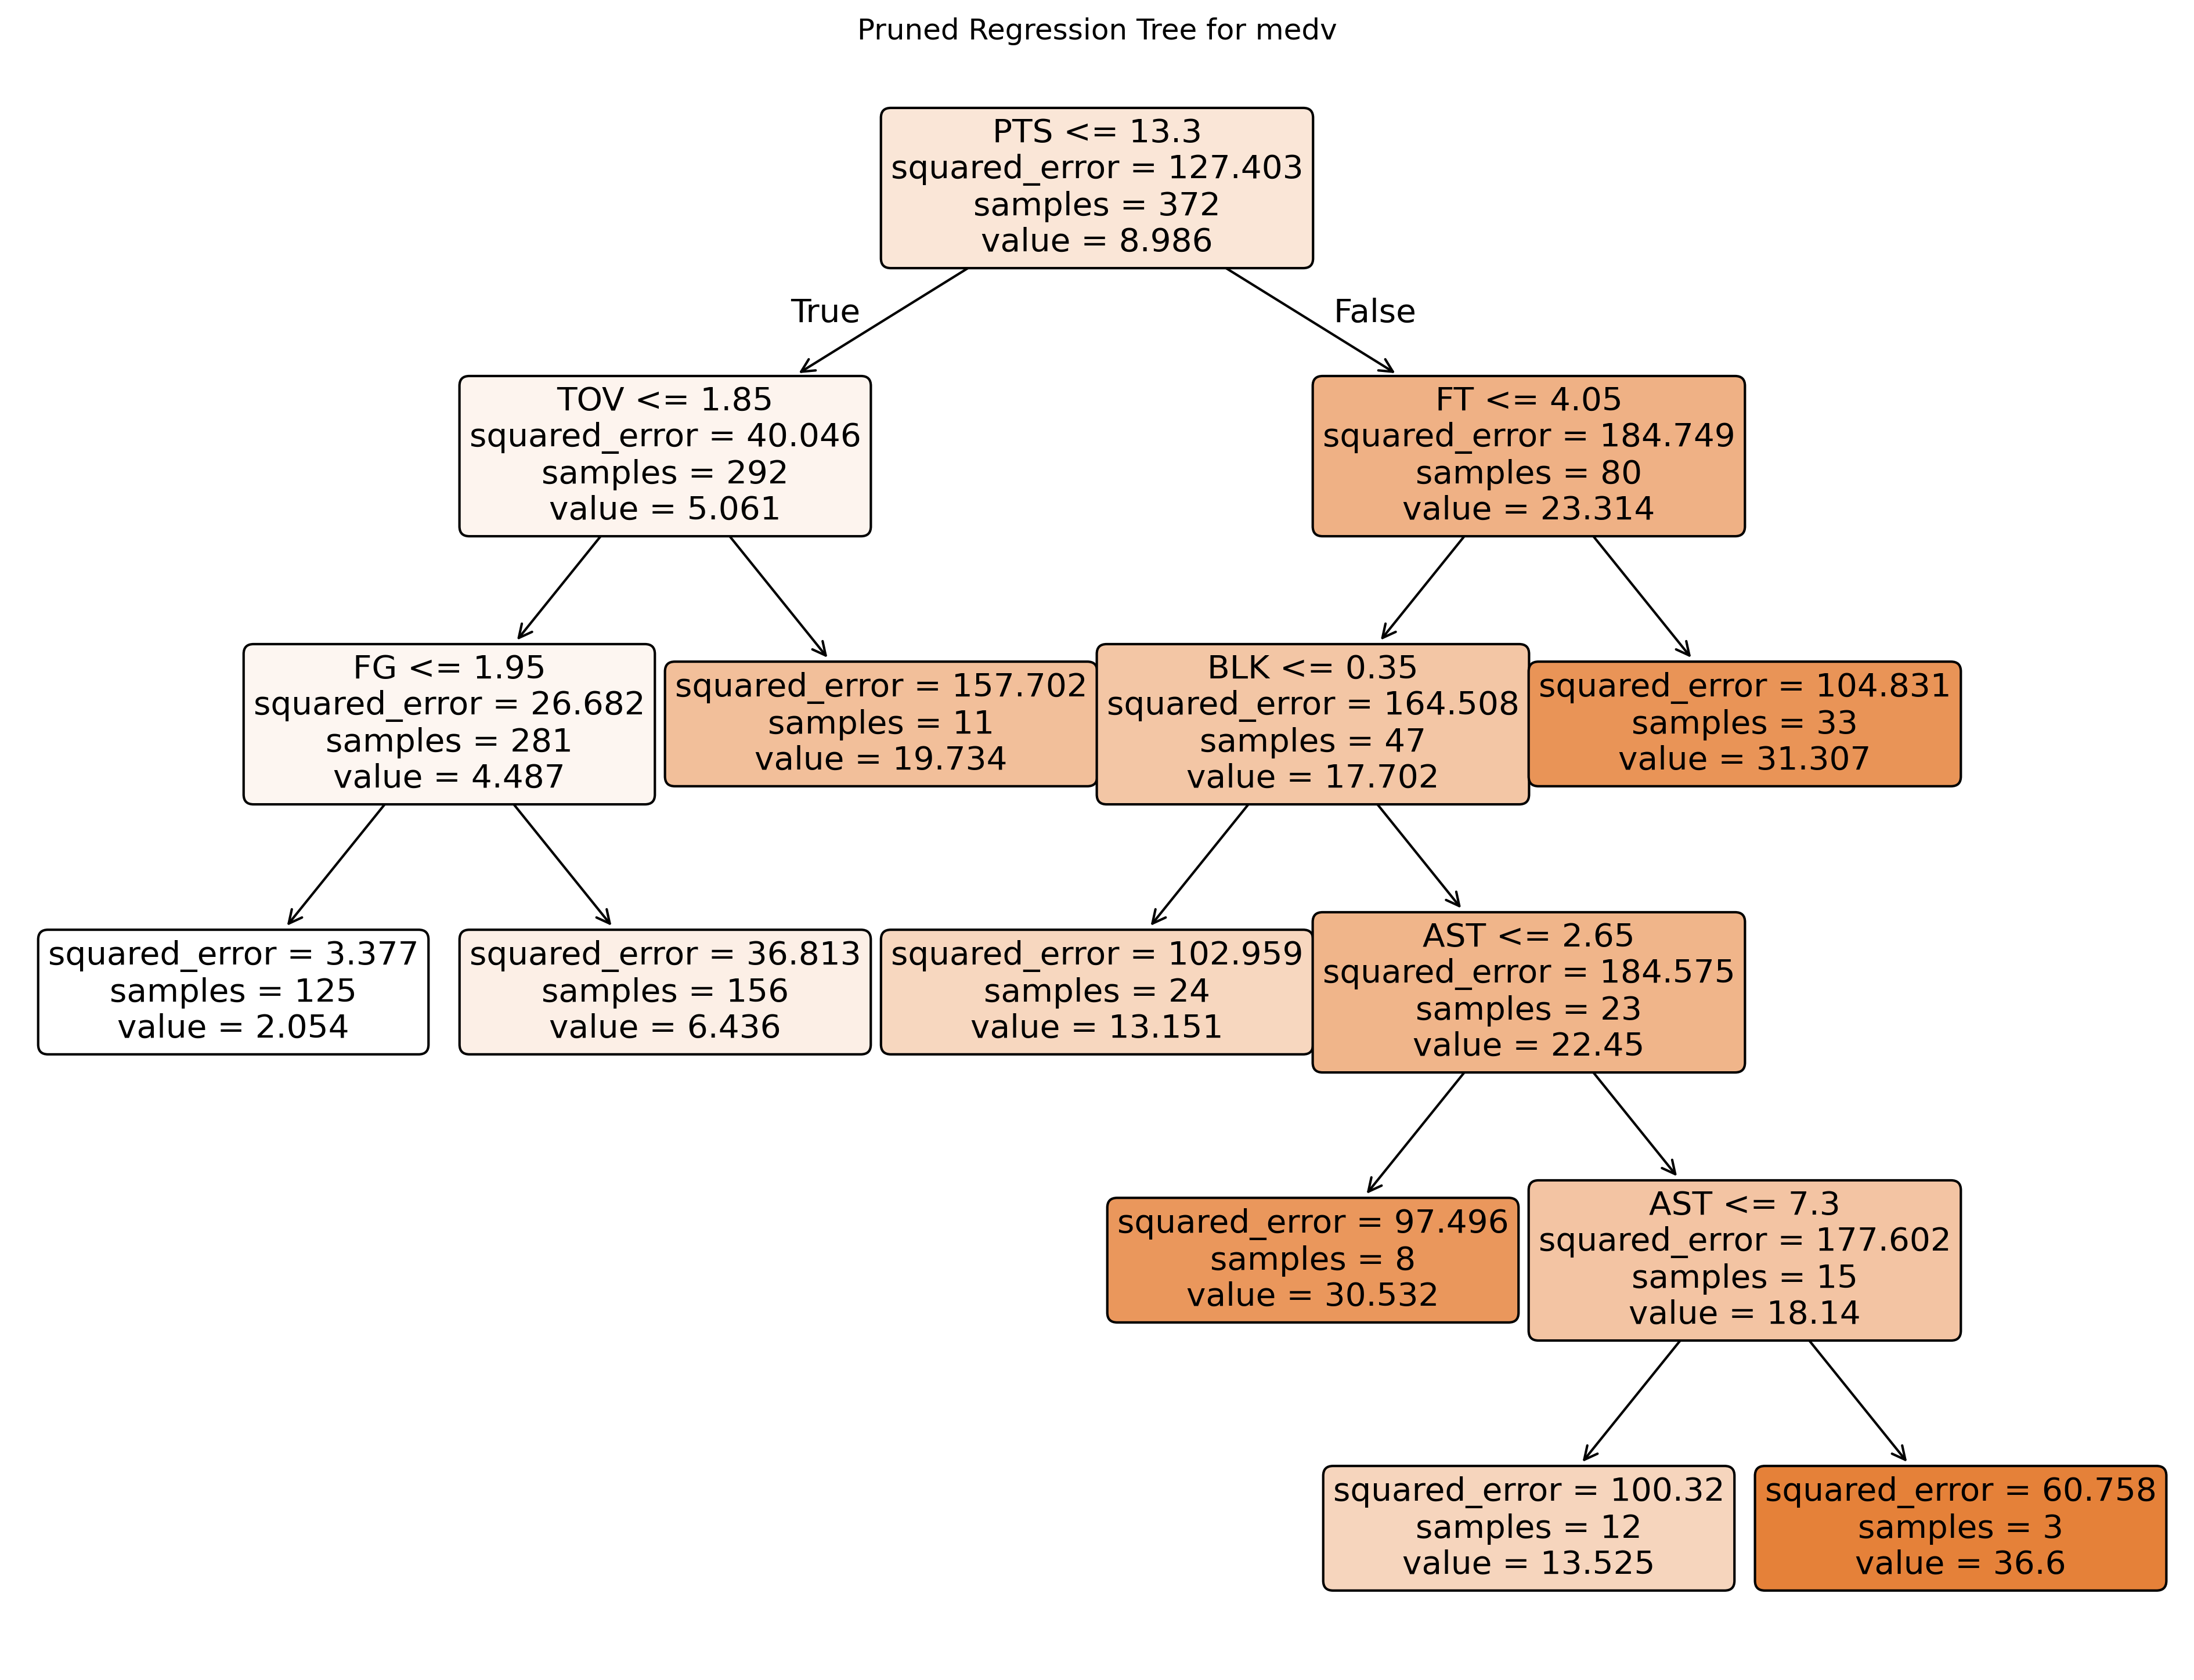

Number of leaves in the pruned tree: 8
Tree depth: 5


In [148]:
# Obtain the cost-complexity pruning path from the initial tree
path = tree_model.cost_complexity_pruning_path(X_train, y_train)  # Get candidate ccp_alpha values and corresponding impurities
ccp_alphas = path.ccp_alphas  # Candidate pruning parameters (alpha values)
impurities = path.impurities  # Impurity values at each candidate alpha

# Exclude the maximum alpha value to avoid the trivial tree (a tree with only the root)
ccp_alphas = ccp_alphas[:-1]  # Remove the last alpha value which would prune the tree to a single node

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Initialize 10-fold CV with shuffling and fixed random state
cv_scores = []  # List to store mean cross-validated scores (negative MSE)
leaf_nodes = []  # List to record the number of leaves for each pruned tree
sse = []         # List to record the sum of squared errors (SSE) on the training set

# Loop over each candidate alpha value to evaluate its performance
for ccp_alpha in ccp_alphas:
    # Create a DecisionTreeRegressor with the current ccp_alpha and other specified parameters
    clf = DecisionTreeRegressor(random_state=42,
                                ccp_alpha=ccp_alpha,
                                min_impurity_decrease=0.005)

    # Perform 10-fold cross-validation and compute negative mean squared error (MSE)
    scores = cross_val_score(clf, X_train, y_train,
                             cv=kf, scoring="neg_mean_squared_error")
    cv_scores.append(np.mean(scores))  # Append the mean CV score for the current alpha

    # Fit the tree on the training data to record additional metrics
    clf.fit(X_train, y_train)
    leaf_nodes.append(clf.get_n_leaves())  # Record the number of leaf nodes in the tree

    # Compute SSE (sum of squared errors) on the training set
    preds = clf.predict(X_train)  # Predict target values on training data
    sse.append(np.sum((y_train - preds) ** 2))  # Calculate and record SSE for training set


# Select the best alpha based on the highest (least negative) mean CV score
best_alpha = ccp_alphas[np.argmax(cv_scores)]  # Identify the alpha with the best CV performance
print("Best alpha:", best_alpha)  # Print the best alpha value

# Train the final pruned tree using the best alpha found
final_tree = DecisionTreeRegressor(random_state=42,
                                   ccp_alpha=best_alpha,
                                   min_impurity_decrease=0.005)
final_tree.fit(X_train, y_train)  # Fit the final model on the training data

len(ccp_alphas)

preds_train = final_tree.predict(train.drop(columns=["Salary_Millions"]))
mse_train = mean_squared_error(y_train, preds_train)
print("Train MSE:", mse_train)

preds = final_tree.predict(test.drop(columns=["Salary_Millions"]))
mse = mean_squared_error(y_test, preds)
print("Test MSE:", mse)

# Plot the pruned tree.
plt.figure(figsize=(16, 12), dpi=300)
plot_tree(final_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Pruned Regression Tree for medv")
plt.show()

# Summary of the final tree
print("Number of leaves in the pruned tree:", final_tree.get_n_leaves())
print("Tree depth:", final_tree.get_depth())

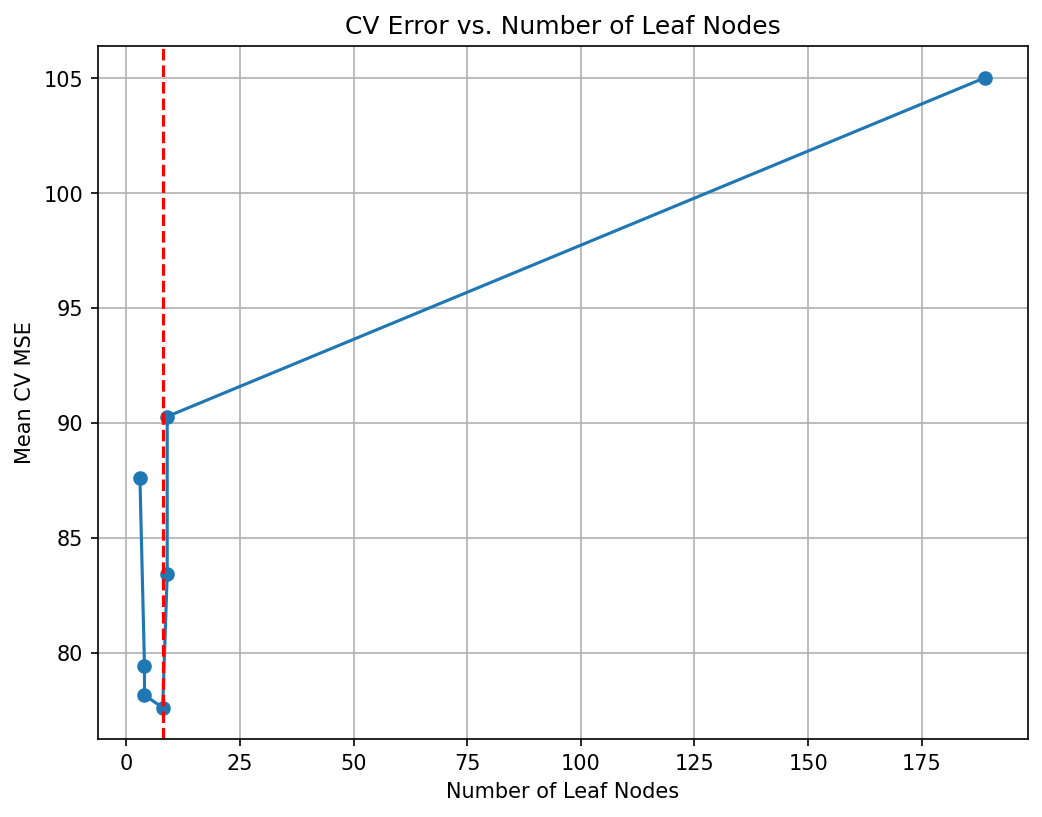

In [149]:
# Plot the average cross-validated MSE against the number of leaf nodes
negative_cv_scores = -np.array(cv_scores)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(leaf_nodes, negative_cv_scores, marker='o', linestyle='-')
plt.axvline(x=final_tree.get_n_leaves(), color='red', linestyle='--', label='Leaf Nodes = 21')  # Add vertical line at 21 leaf nodes
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Mean CV MSE")
plt.title("CV Error vs. Number of Leaf Nodes")
plt.grid(True)
plt.show()

1. Initial Drop in MSE:

  - When the tree is very simple (few leaf nodes), it underfits the data, resulting in a high MSE.
  - Adding more leaf nodes allows the tree to capture more patterns, reducing the MSE.
2. Leveling Off:

  - After a certain point, adding more leaf nodes doesn't significantly reduce the MSE.
  - This indicates that the tree is becoming overly complex and starts to fit noise in the training data (overfitting).
3. Optimal Point (Red Line):

  - The red dashed line marks the optimal number of leaf nodes where the CV MSE is minimized.
  - Beyond this point, increasing the number of leaf nodes may lead to overfitting without significant improvement in model performance.

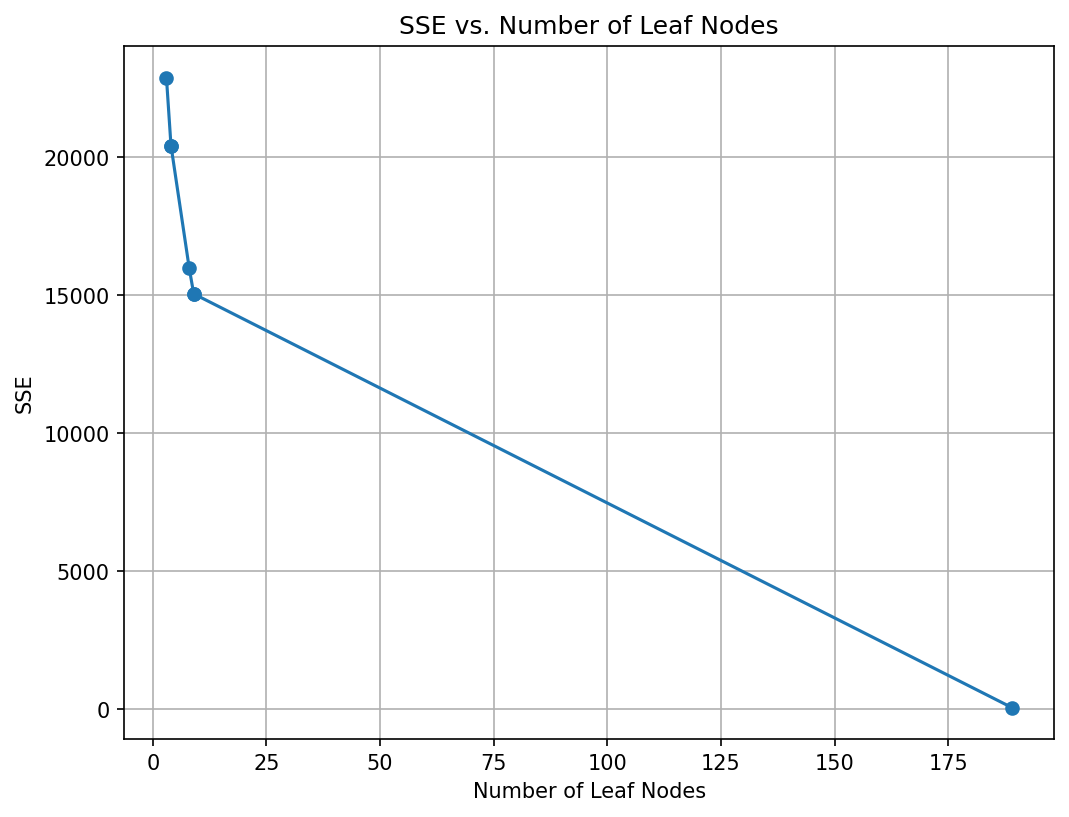

In [150]:
# Plot the SSE on the training against the number of leaf nodes
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(leaf_nodes, sse, marker='o', linestyle='-')
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("SSE")
plt.title("SSE vs. Number of Leaf Nodes")
plt.grid(True)
plt.show()

#### Random Forest

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Random Forest Model:
RandomForestRegressor(max_features=13, n_estimators=500, oob_score=True,
                      random_state=42)
Out-of-bag score: 0.5199871419443182
Train MSE: 8.299471119476351
Test MSE: 47.01993693271793


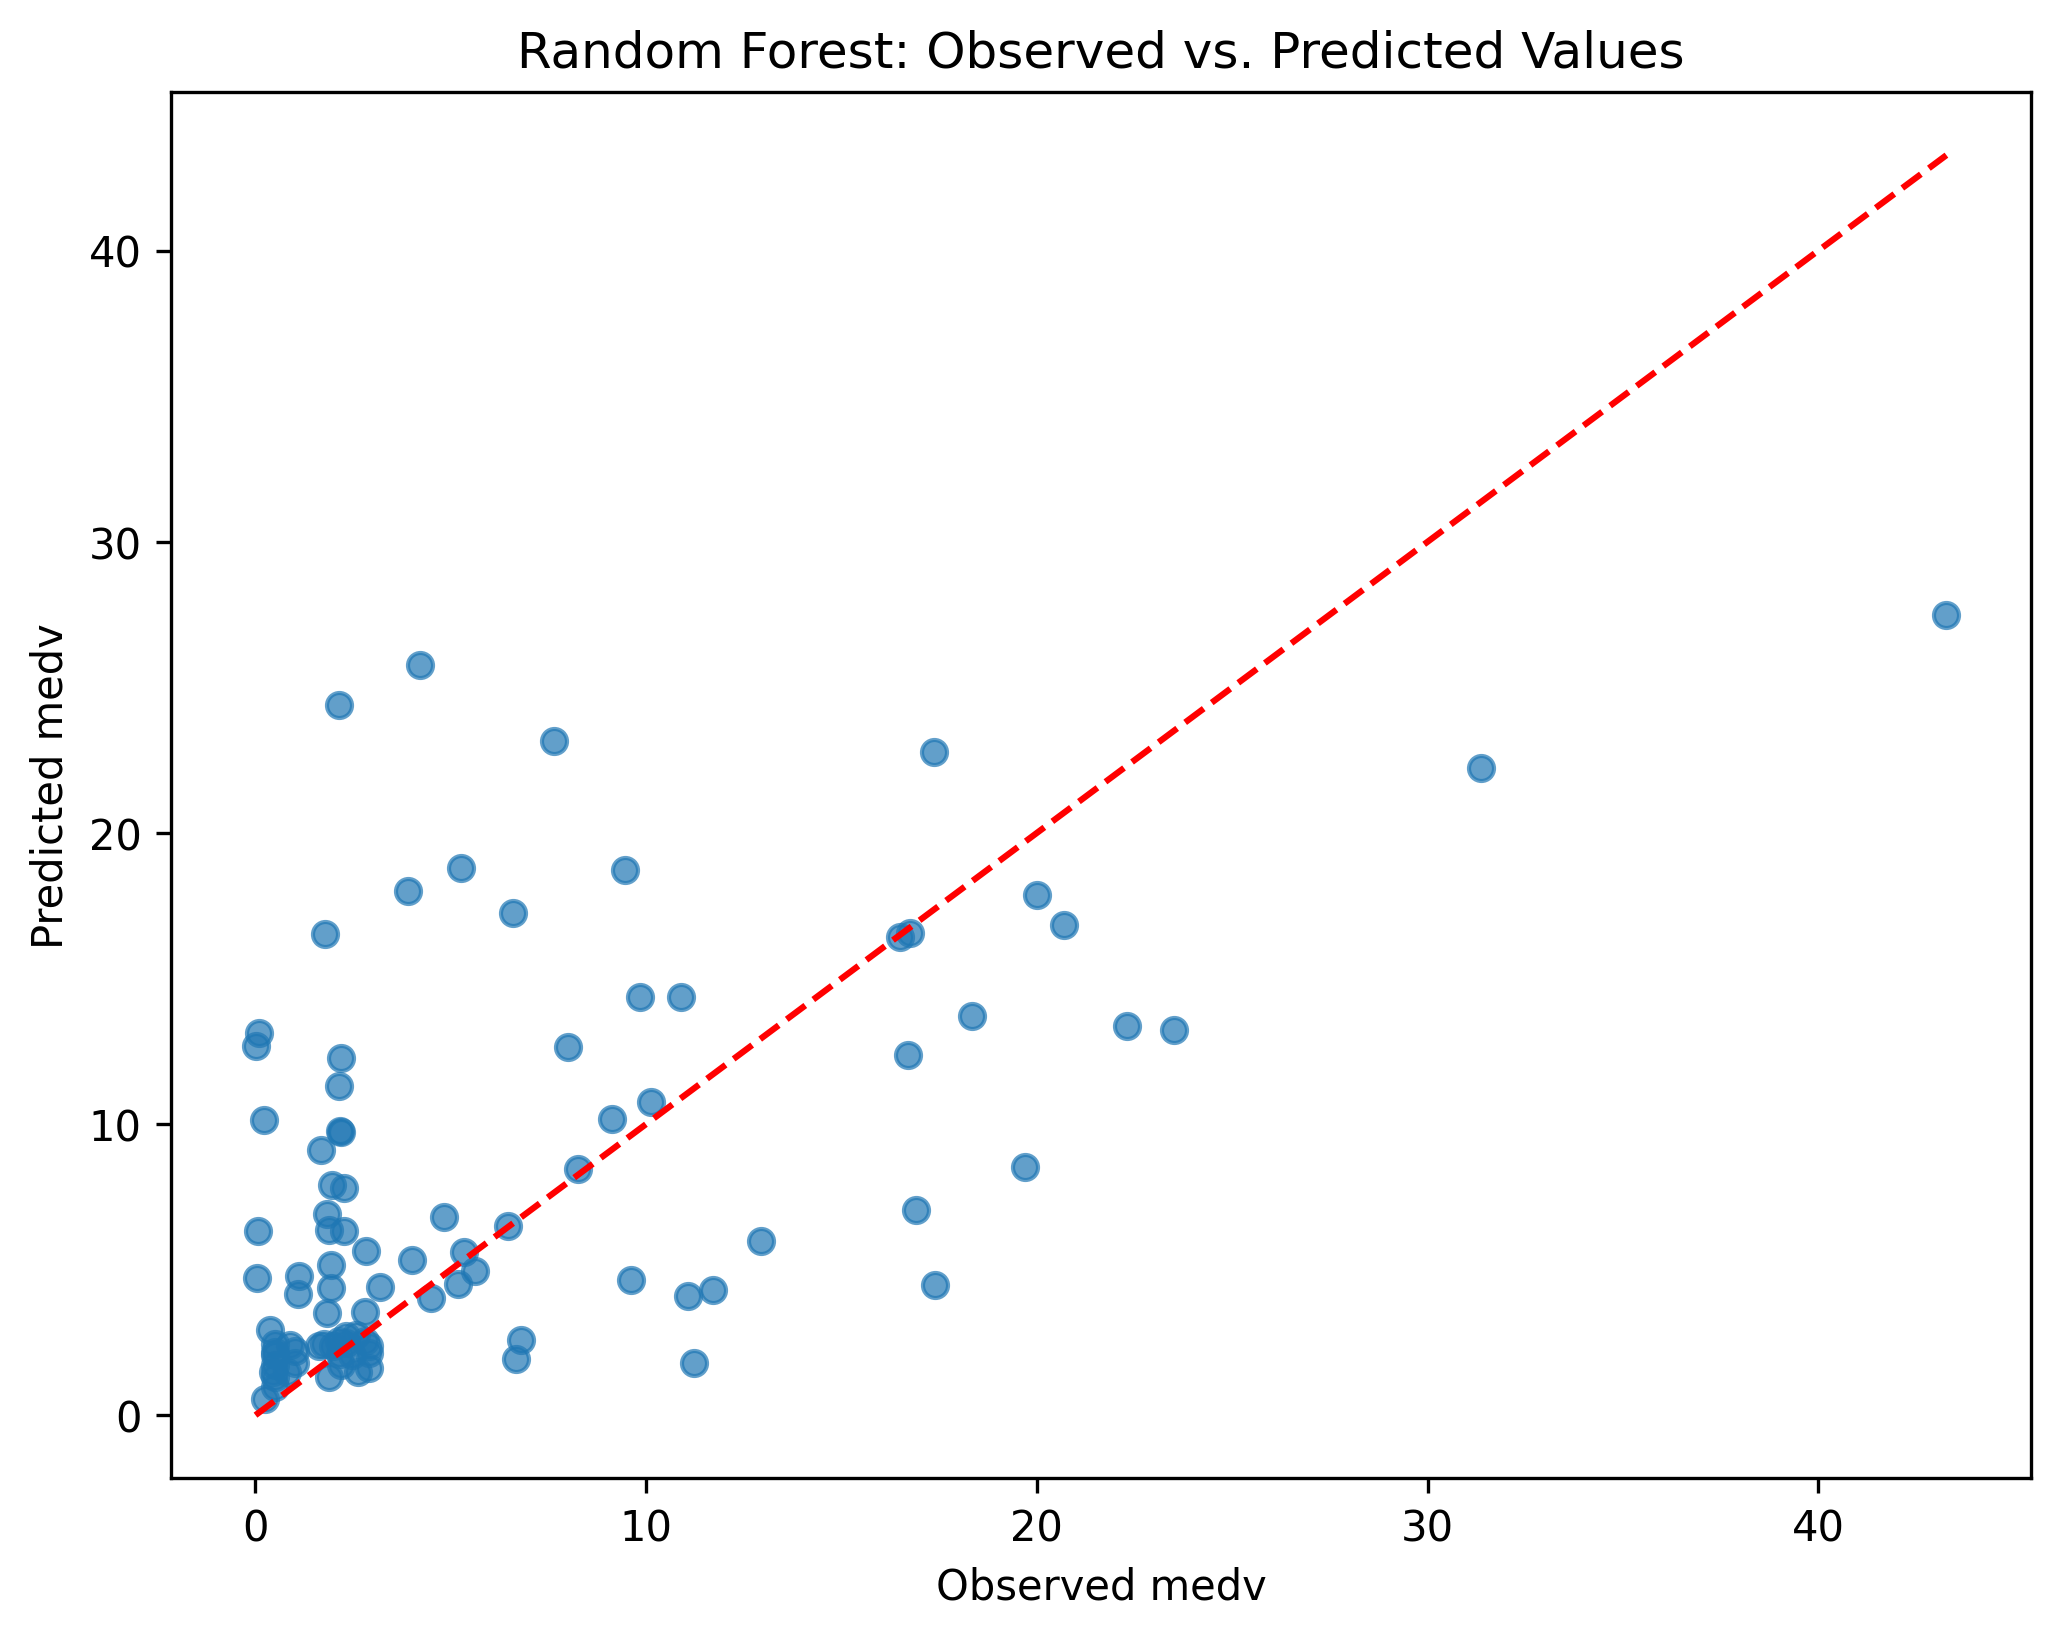

In [152]:
# Build the Random Forest model
# max_features=13 means that at each split the algorithm randomly considers 13 predictors.
rf = RandomForestRegressor(max_features=13,  # Use 13 features at each split
                           n_estimators=500,  # Number of trees in the forest
                           random_state=42,
                           oob_score=True)    # Use out-of-bag samples to estimate error
rf.fit(X_train, y_train)


# Print the model details
print("Random Forest Model:")
print(rf)

# Output the model details (feature importances, OOB score, etc.)
print("Out-of-bag score:", rf.oob_score_)  # A rough estimate of generalization error


# Generate predictions on training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate Mean Squared Errors (MSE) for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

#Plot predicted vs. observed values for test data
plt.figure(figsize=(8,6), dpi=300)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Observed medv")
plt.ylabel("Predicted medv")
plt.title("Random Forest: Observed vs. Predicted Values")
plt.show()

Key Results
1. Out-of-Bag (OOB) Score: 0.519
  - An OOB score of 0.519 suggests that the model explains around 52% of the salary variance, which is decent but leaves room for improvement.

2. Train Mean Squared Error (MSE): 8.229
  - The MSE on the training set is extremely low, indicating that the model fits the training data well.
3. Test Mean Squared Error (MSE): 47.019
  - The test MSE is significantly higher than the training MSE, which indicates that the model is struggling to generalize to unseen data. This could be a sign of overfitting.

Plot
  - The points near the origin are closely aligned along the red line, indicating that the model performs well for players with lower salaries.



Feature Importances:
PTS: 0.2522
AST: 0.0685
TRB: 0.0303
STL: 0.0326
TOV: 0.1678
ORB: 0.0261
DRB: 0.0415
FG: 0.1125
FG_pct: 0.0458
FT: 0.1661
PF: 0.0311
BLK: 0.0255


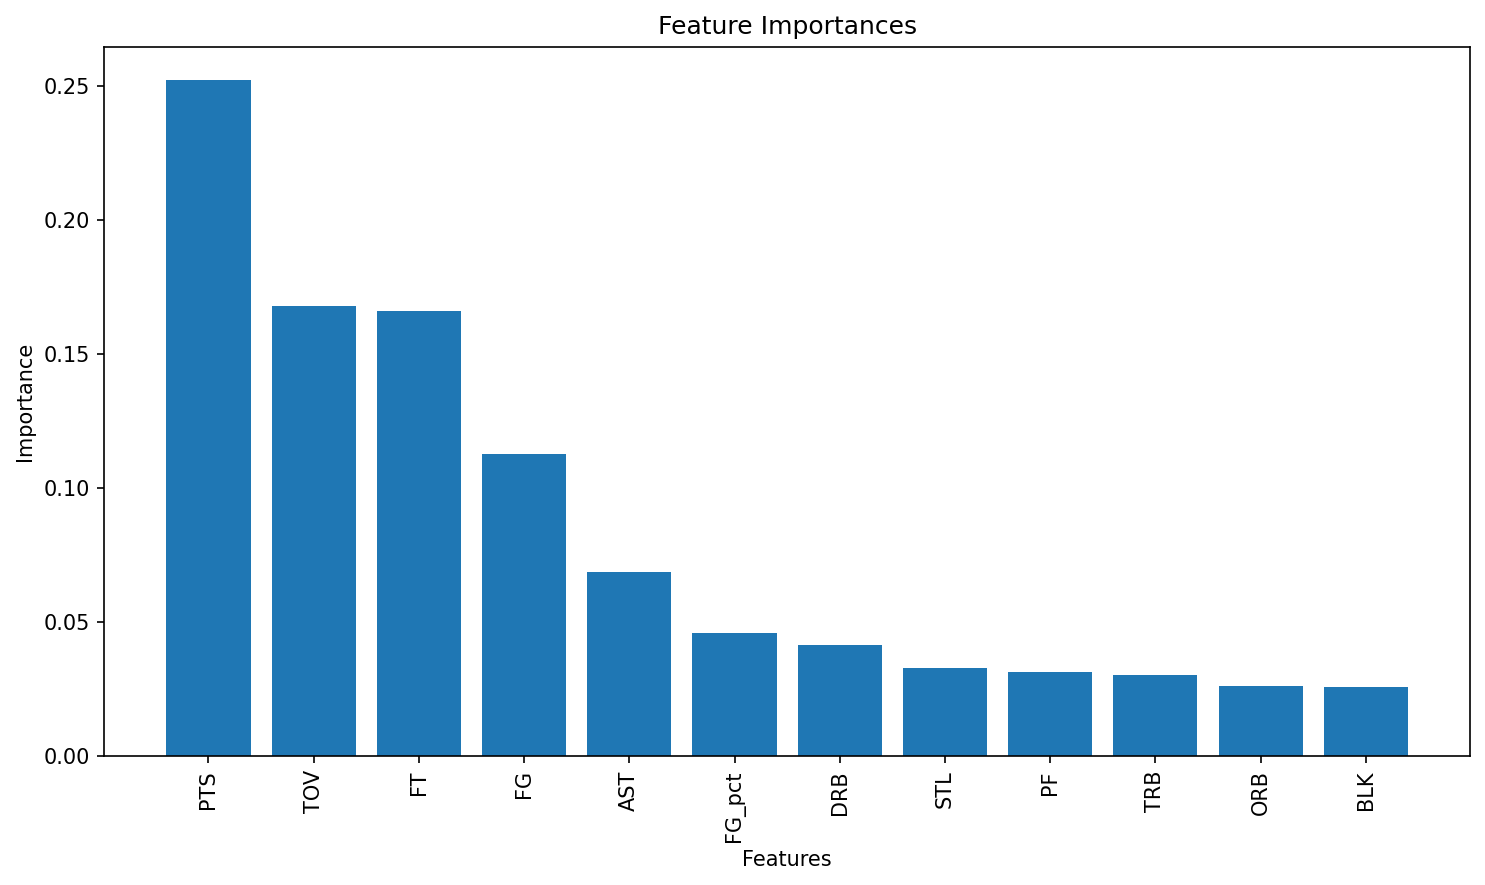

In [153]:
# Get feature importances from the model (equivalent to importance(bag.boston) in R)
importances = rf.feature_importances_
feature_names = X_train.columns

print("Feature Importances:")
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.4f}")

# Plot the feature importances, similar to varImpPlot(bag.boston) in R
# Sort the features by importance for a nicer plot.
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6), dpi=150)
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

- The feature importance analysis reveals that Points Per Game (PTS) and Turnovers Per Game (TOV) are the most critical factors in explaining player salary, followed by performance metrics like Free Throws Made Per Game (FT), Field Goals Made Per Game (FG), and Assists Per Game (AST).
- Lesser importance is attributed to defensive stats and advanced metrics such as Blocks (BLK) and Offensive Rebounds (ORB), suggesting that offensive contributions and playing time heavily influence salary.

#### Gradient Boosting with XGBoost

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


<Figure size 1000x800 with 0 Axes>

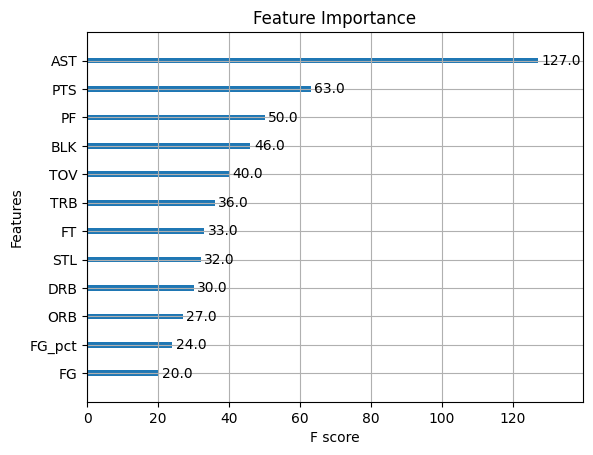

Train MSE: 26.260373365921154
Test MSE: 43.52851752630915
Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 180, 'subsample': 1}


In [154]:
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay

# Define the grid of hyperparameters
param_grid = {
    "n_estimators": list(range(20, 201, 20)),  # nrounds: 20, 40, ..., 200
    "learning_rate": [0.025, 0.05, 0.1, 0.3],    # eta
    "gamma": [0],                               # gamma
    "max_depth": [1, 2, 3, 4],
    "colsample_bytree": [1],
    "min_child_weight": [1],
    "subsample": [1]
}

# Initialize the XGBRegressor with the regression objective and fixed random state for reproducibility
xgb_reg = XGBRegressor(objective="reg:squarederror", random_state=1937, verbosity=1)

# Set up GridSearchCV with 10-fold cross-validation; scoring is negative MSE
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=10,
    verbose=1  # Adjust verbosity as needed
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Train the final model using the best parameters (grid_search.best_estimator_ is already refit on entire data)
final_model = grid_search.best_estimator_

# Plot variable importance using XGBoost's plot_importance function
plt.figure(figsize=(10, 8))
plot_importance(final_model)
plt.title("Feature Importance")
plt.show()

# Calculate MSE on the training data
y_pred_train = final_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", train_mse)

# Calculate MSE on the test data
y_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Model Performance:
- Train MSE: 26.260373365921154
- Test MSE: 43.52851752630915
  - The Test MSE is higher than the Train MSE, indicating that the model may still be slightly overfitting, despite using gradient boosting. However, the gap is much narrower compared to the Random Forest model, suggesting that XGBoost is better at generalizing to the test data.

- AST and PTS dominate as the most important features.
- PF, BLK, and TRB are moderately important features reflecting their role in evaluating player efficiency and defensive capabilities.
- The dominance of assists suggest that playmaking ability is highly valued in determining salary.

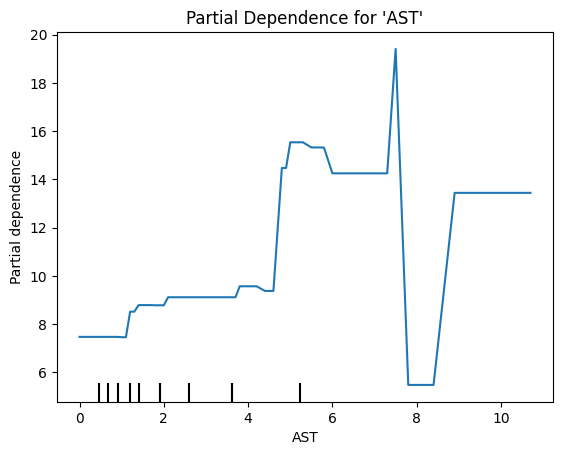

In [156]:
feature_names = filtered_nba_data.drop(columns=["Salary_Millions"]).columns.tolist()
ast_index = feature_names.index("AST")  # Replace "AST" with the feature of interest
PartialDependenceDisplay.from_estimator(final_model, X_train, features=[ast_index],
                                        feature_names=feature_names, kind="average")
plt.title("Partial Dependence for 'AST'")
plt.show()

Behavior of the Curve:
- For players with 0–2 assists, the predicted salary remains relatively constant ($8 million).
  - This suggests that players with very few assists do not see a significant impact on their salary based on this metric alone.

- Between 2 and 6 assists, there is a noticeable upward trend in partial dependence, indicating that an increase in assists strongly correlates with higher predicted salaries.

  - Predicted salary rises from 8 million to 14 million in this range.

- After 6 assists, the partial dependence value drops sharply to $6 million.

  - This could indicate overfitting, outliers, or a lack of data for players with 7 or more assists.

- For players with more than 8 assists, the predicted salary stabilizes around $15–$16 million.

### Unsupervised Learning

#### Clustering

In [157]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances, calinski_harabasz_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

url = url = "http://bcdanl.github.io/data/nba_players.csv"
nba_data = pd.read_csv(url)

In [161]:
vars_to_use = nba_data.select_dtypes(include=np.number).columns[1:]  # Exclude the first column (index)
scaler = StandardScaler()

pmatrix = scaler.fit_transform(nba_data[vars_to_use])

pcenter, pscale = scaler.mean_, scaler.scale_

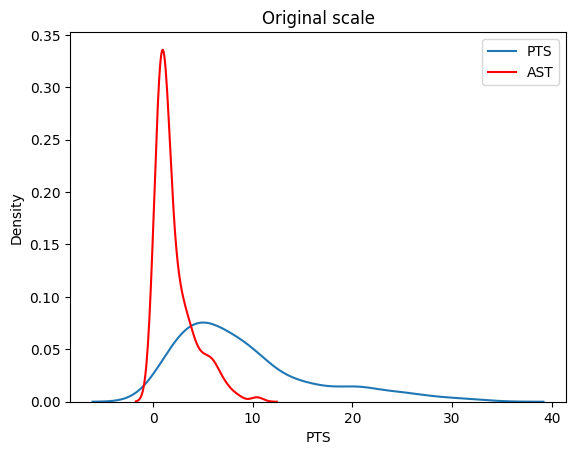

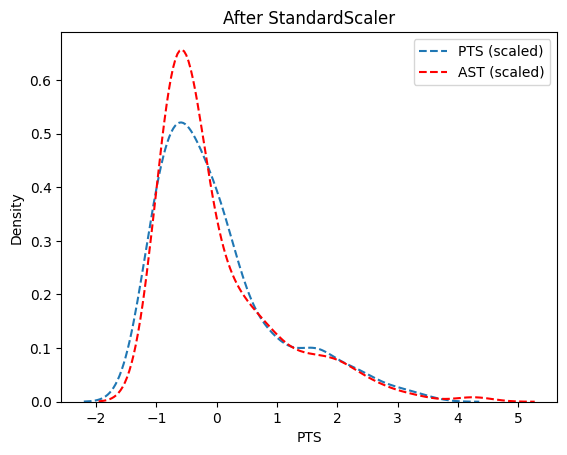

In [163]:
fig, ax = plt.subplots()
sns.kdeplot(data=nba_data, x="PTS", ax=ax, label="PTS")
sns.kdeplot(data=nba_data, x="AST", ax=ax, color="red", label="AST")
ax.set_title("Original scale"); ax.legend(); plt.show()

scaled_df = pd.DataFrame(pmatrix, columns=vars_to_use)
fig, ax = plt.subplots()
sns.kdeplot(data=scaled_df, x="PTS", ax=ax, linestyle="--", label="PTS (scaled)")
sns.kdeplot(data=scaled_df, x="AST", ax=ax, color="red", linestyle="--",
            label="AST (scaled)")
ax.set_title("After StandardScaler"); ax.legend(); plt.show()

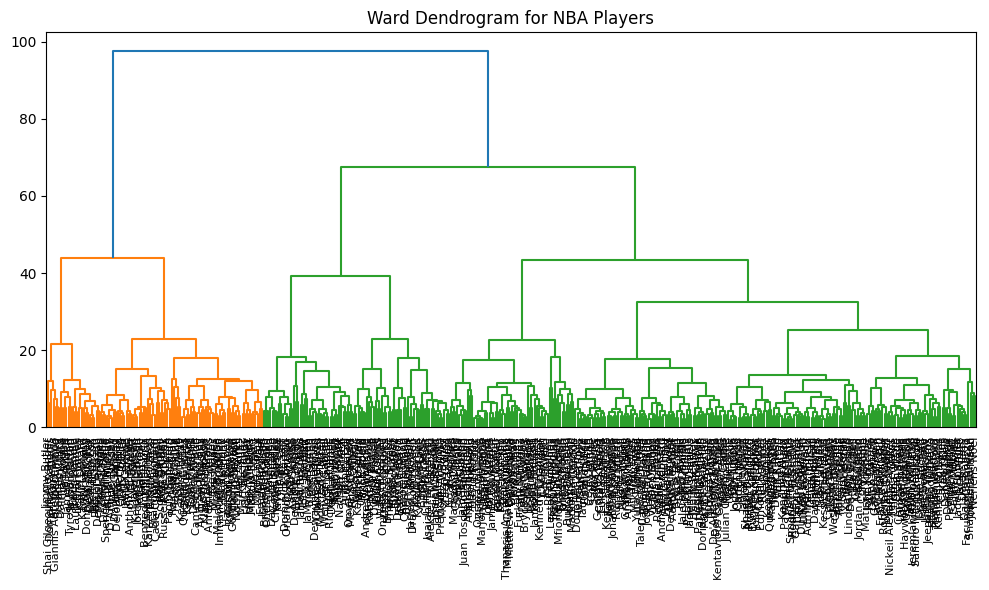

In [168]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's method
link = linkage(pmatrix, method="ward")

# Create the dendrogram
plt.figure(figsize=(10, 6))

# Replace "Player" with the column that contains player names or identifiers in your dataset
dendrogram(link, labels=nba_data["PlayerName"].values, leaf_font_size=8)  # Adjust "Player" as needed

# Add title and formatting
plt.title("Ward Dendrogram for NBA Players")
plt.tight_layout()
plt.show()

In [169]:
groups_hc = fcluster(link, t=5, criterion="maxclust")      # k = 5

# Convenience: print selected cols by cluster
def print_clusters(df: pd.DataFrame, labels, cols):
    for k, sub in df.assign(cluster=labels).groupby("cluster"):
        print(f"\nCluster {k} ({len(sub)} obs)")
        print(sub[cols].to_string(index=False))

cols_to_print = ["PlayerName", "PTS", "AST", "TRB"]
print_clusters(nba_data, groups_hc, cols_to_print)


Cluster 1 (25 obs)
             PlayerName  PTS  AST  TRB
          Stephen Curry 29.4  6.3  6.1
           LeBron James 28.9  6.8  8.3
           Kevin Durant 29.1  5.0  6.7
          Kawhi Leonard 23.8  3.9  6.5
  Giannis Antetokounmpo 31.1  5.7 11.8
         Damian Lillard 32.2  7.3  4.8
           Kyrie Irving 27.1  5.5  5.1
          Anthony Davis 25.9  2.6 12.5
           Jimmy Butler 22.9  5.3  5.9
             Trae Young 26.2 10.2  3.0
          Pascal Siakam 24.2  5.8  7.8
           Devin Booker 27.8  5.5  4.5
            Joel Embiid 33.1  4.2 10.2
           James Harden 21.0 10.7  6.1
       Donovan Mitchell 28.3  4.4  4.3
Shai Gilgeous-Alexander 31.4  5.5  4.8
           Jayson Tatum 30.1  4.6  8.8
           De'Aaron Fox 25.0  6.1  4.2
          Jalen Brunson 24.0  6.2  3.5
          DeMar DeRozan 24.5  5.1  4.6
          Julius Randle 25.1  4.1 10.0
       Domantas Sabonis 19.1  7.3 12.3
        Lauri Markkanen 25.6  1.9  8.6
              Ja Morant 26.2  8.1  5.9
     

#### Principal Compnent Analysis (PCA)

In [170]:
pca = PCA().fit(pmatrix)
proj = pca.transform(pmatrix)[:, :2]                # first 2 PCs

proj_df = (
    pd.DataFrame(proj, columns=["PC1", "PC2"])
      .assign(cluster=groups_hc.astype(str),
              country=nba_data["PlayerName"])
)

In [173]:
# Compute PCA loading vectors
loadings_nba = pd.DataFrame(
    pca.components_.T,  # Transpose of PCA components to get loadings
    index=vars_to_use,  # Numeric columns used in PCA
    columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)]  # Name PCs as PC1, PC2, ...
)

# Print the first 3 loading vectors (for PC1, PC2, PC3)
print(loadings_nba.iloc[:, :3].round(2))

               PC1   PC2   PC3
Age           0.03 -0.01  0.15
GP            0.12 -0.02  0.09
GS            0.18 -0.06 -0.03
MP            0.20 -0.10 -0.01
FG            0.21 -0.08 -0.06
FGA           0.20 -0.14 -0.08
FG_pct        0.09  0.26  0.14
3P            0.12 -0.22  0.15
3PA           0.12 -0.24  0.10
3P_pct        0.03 -0.10  0.28
2P            0.21 -0.00 -0.14
2PA           0.20 -0.04 -0.17
2P_pct        0.06  0.19  0.20
eFG_pct       0.09  0.18  0.33
FT            0.19 -0.06 -0.11
FTA           0.20 -0.04 -0.13
FT_pct        0.04 -0.13  0.13
ORB           0.11  0.24 -0.13
DRB           0.19  0.09 -0.11
TRB           0.18  0.15 -0.13
AST           0.16 -0.15 -0.06
STL           0.15 -0.09  0.03
BLK           0.11  0.19 -0.07
TOV           0.19 -0.09 -0.17
PF            0.15  0.05 -0.06
PTS           0.21 -0.10 -0.05
TotalMinutes  0.18 -0.08  0.03
PER           0.19  0.10  0.08
TS_pct        0.11  0.16  0.32
3PAr         -0.07 -0.23  0.21
FTr           0.07  0.13 -0.13
ORB_pct 

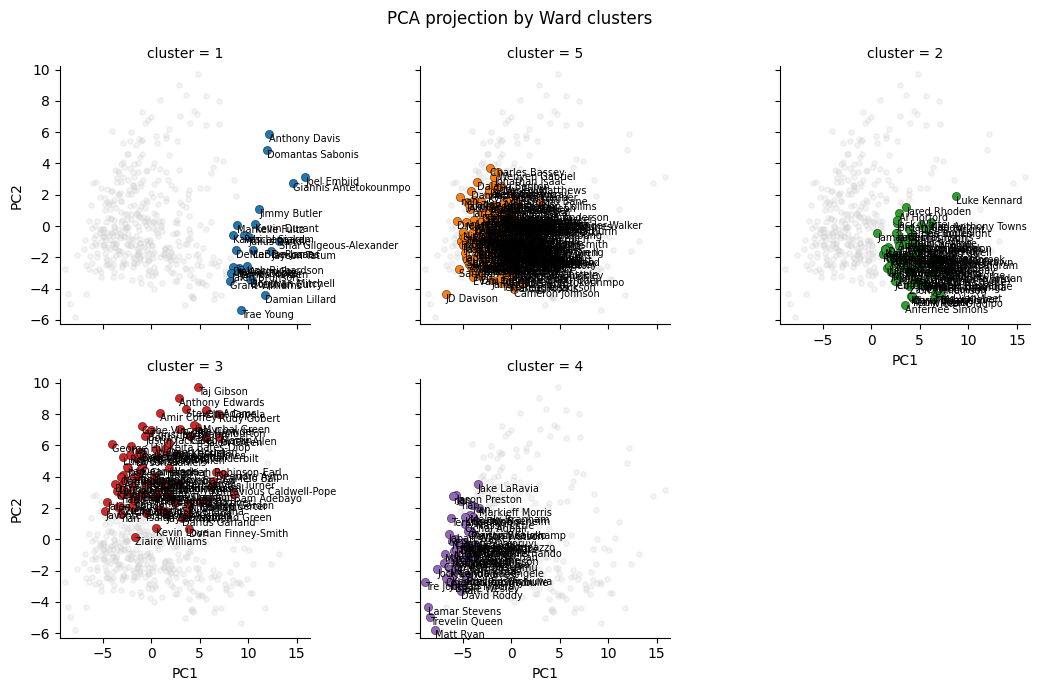

In [174]:
# Global axis limits so every facet is identical
xlim = proj_df["PC1"].min() - .5, proj_df["PC1"].max() + .5
ylim = proj_df["PC2"].min() - .5, proj_df["PC2"].max() + .5

# Create FacetGrid with shared axes
g = sns.FacetGrid(
        proj_df, col="cluster", col_wrap=3, height=3.5,
        sharex=True, sharey=True, hue="cluster", palette="tab10"
    )
# --------------------------------------------------
# Helper that draws the full background cloud
# --------------------------------------------------
def background_scatter(x, y, **kwargs):
    """Ignore facet-specific x & y — plot all points instead."""
    plt.scatter(
        proj_df["PC1"], proj_df["PC2"],
        color="lightgray", alpha=.25, s=15, zorder=1
    )

# Plot the background in every facet
g.map(background_scatter, "PC1", "PC2")

# Foreground: cluster-specific points
g.map_dataframe(
    sns.scatterplot, x="PC1", y="PC2",
    edgecolor="black", linewidth=.3, s=35, zorder=2
)

# Text labels for the cluster’s own points
def annotate(data, **k):
    for x, y, label in zip(data.PC1, data.PC2, data.country):
        plt.text(x, y, label, fontsize=7, ha="left", va="top")
g.map_dataframe(annotate)

# Apply identical limits to every axis
for ax in g.axes.flat:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

g.fig.subplots_adjust(top=.9)
g.fig.suptitle("PCA projection by Ward clusters")
plt.show()

- Cluster 1 contains high profile players thatn likely excel in multiple performance metrics.

- Cluster 2 represents specialized roles such as shooters or versatile big men.

- Cluster 3 represents balanced but diverse performances, with contributions in scoring, defense, and rebounding.

- Cluster 4 represents role players or bench players who contribute in limited aspects.

- Cluster 5 represents players that specialize in high offensive contributions.

### Interpretations of PC1 and PC2

PC1 (Horizontal Axis):

- Description:
  - PC1 captures the largest variance in the dataset. Features with high absolute loadings for PC1 are the most influential in this component.
- Key Features with High Loadings:
  - FG (Field Goals), PTS (Points), MP (Minutes Played), FGA (Field Goal Attempts), 2P (Two-Point Goals), WS (Win Shares).
- Interpretation:
  - PC1 likely represents overall offensive contributions:
    - Players with high PC1 scores are typically offensive stars who play significant minutes and contribute heavily to scoring.
    - Features related to scoring efficiency and volume (e.g., field goals, points, and win shares) dominate this component.

PC2 (Vertical Axis):

- Description:
  - PC2 captures the second-largest variance in the dataset, orthogonal to PC1. It highlights variance not explained by PC1, often related to other aspects of player performance.
- Key Features with High Loadings:
  - ORB (Offensive Rebounds), TRB (Total Rebounds), BLK_pct (Block Percentage), FG_pct (Field Goal Percentage), TS_pct (True Shooting Percentage).
- Interpretation:
  - PC2 likely represents defensive and efficiency contributions:
    - Players with high PC2 scores excel in rebounding, shot-blocking, and shooting efficiency. They may be defensive anchors or highly efficient contributors.

#### K-Means

In [175]:
k = 5
kmeans = KMeans(n_clusters= k, n_init=100, max_iter=100, random_state=1)
groups_km = kmeans.fit_predict(pmatrix)

print("k-means cluster sizes:", np.bincount(groups_km))
print_clusters(nba_data, groups_km + 1, cols_to_print)

k-means cluster sizes: [ 79 135  58  33 128]

Cluster 1 (79 obs)
            PlayerName  PTS  AST  TRB
        Jonathan Isaac  5.0  0.5  4.0
         Chris Boucher  9.4  0.4  5.5
      Robert Covington  6.0  1.2  3.5
        Richaun Holmes  3.1  0.2  1.9
        DeAndre Jordan  5.1  0.9  5.2
              Mo Bamba  6.6  0.9  4.6
           Jae Crowder  6.9  1.5  3.8
         James Wiseman 10.0  0.7  5.9
           Maxi Kleber  5.9  1.4  3.6
          Daniel Theis  7.0  1.3  3.1
        Gary Payton II  4.6  1.4  3.1
        Dewayne Dedmon  5.2  0.7  3.5
        JaMychal Green  6.4  0.9  3.6
        Thaddeus Young  4.4  1.4  3.1
          Jaxson Hayes  5.0  0.7  2.8
            Khem Birch  2.2  0.4  1.3
          JaVale McGee  4.4  0.3  2.5
          Goga Bitadze  4.4  1.0  3.6
        Hamidou Diallo  9.3  1.0  3.5
           Jalen Smith  9.4  1.0  5.8
            Jeff Green  7.8  1.2  2.6
         Darius Bazley  5.2  0.9  3.2
       Stanley Johnson  5.8  2.2  3.2
              Alex Len 

In [176]:
krange = range(2, 11)      # k = 2…10  (k=1 undefined for CH/ASW)
ch_scores, asw_scores = [], []

for k in krange:
    lbls = KMeans(n_clusters=k, n_init=20, random_state=0).fit_predict(pmatrix)
    ch_scores.append(calinski_harabasz_score(pmatrix, lbls))
    asw_scores.append(silhouette_score(pmatrix, lbls))

best_k_ch  = krange[np.argmax(ch_scores)]
best_k_asw = krange[np.argmax(asw_scores)]
print(f"Best k by CH : {best_k_ch}")
print(f"Best k by ASW: {best_k_asw}")

Best k by CH : 2
Best k by ASW: 2


#### Scree Plot

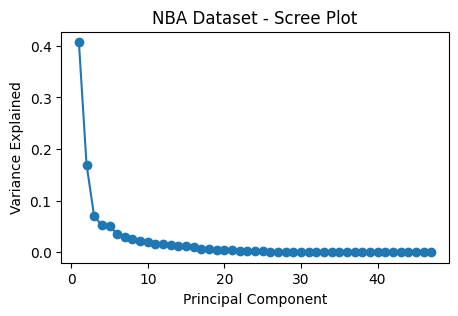

In [177]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "o-")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("NBA Dataset - Scree Plot")
plt.show()

## Significane of the Project

Our analysis of the NBA dataset involved a variety of machine learning techniques,clustering strategies, PCA, and data visualizations. Each of these methods brought its own insights, but the combined findings have significant real-world implications for sports management, business decision-making, and broader societal themes. Here's why the work matters and how it can be applied:



Comprehensive Player Profiling
- Using hierarchical clustering and PCA, we grouped players into clusters based on their performance metrics. This profiling is more than just a statistical exercise—it allows teams to understand roles, strengths, and weaknesses at a deeper level.

- Impact:
  - Coaches can devise game strategies based on player clusters (e.g., pairing offensive stars with defensive specialists).
  - Teams can identify gaps in their roster and recruit players to fill specific roles.
  - Player development programs can be tailored to improve specific skills based on cluster characteristics.

Real World Impact
- In Business: The findings can help organizations make data-driven decisions, optimize resource allocation, and improve efficiency.
- In Sports: Teams can use these insights for player evaluation, recruitment, and strategy development.
- In Healthcare or Education (if applicable): Similar methods can identify trends to personalize care or learning experiences.

Influencing Business Decisions
- Targeted Marketing: Clustering helps segment users or customers, enabling personalized marketing campaigns.
- Cost Optimization: Identifying key drivers with PCA can streamline operations and focus on high-impact areas.
- Strategic Planning: Patterns in the data inform long-term strategy, ensuring alignment with trends.


Informing Public Policy
- Equity and Fairness: Data-driven methods promote unbiased decision-making, ensuring resources are distributed based on need or merit.
- Policy Design: Insights can guide the development of policies that address systemic issues or optimize public services.
- Monitoring and Evaluation: Machine learning models can be used to track the success of interventions.

Broader Themes
- Data-Driven Decision-Making: This project highlights the importance of leveraging data to replace guesswork and intuition with evidence-based strategies.
- Efficiency and Innovation: Machine learning techniques allow us to process and interpret complex datasets, driving innovation across industries.
- Scalability: The methods used here are applicable to other domains, from sports to finance, healthcare, and beyond.

Conclusion
- By connecting our findings to real-world applications, we demonstrate the relevance and importance of data analysis. Whether it’s improving business outcomes, informing public policies, or enhancing operational efficiency, these insights have practical value that extends far beyond the scope of this project.